In [1]:
import cv2
import IPython.display
from ipywidgets import widgets
import numpy as np
from io import BytesIO
import PIL.Image
from hsv_utils import *

In [2]:
def hsv_select(**kwargs):
    hsv_min = tuple([int(l) for l, h in kwargs.values()])
    hsv_max = tuple([int(h) for l, h in kwargs.values()])
    hsv_min_new = (hsv_min[0]/2, hsv_min[1], hsv_min[2])
    hsv_max_new = (hsv_max[0]/2, hsv_max[1], hsv_max[2])
    mask = cv2.inRange(img_hsv, hsv_min_new, hsv_max_new)
    img_masked = cv2.bitwise_and(img_rgb, img_rgb, mask = mask)
    f = BytesIO()
    PIL.Image.fromarray(img_masked).save(f, 'jpeg')
    img_jpeg = IPython.display.Image(data=f.getvalue())
    IPython.display.display_jpeg(img_jpeg)

In [3]:
# 画像を読み込む。
img = cv2.imread("./picture/red_blue_cone.jpg")
img = resize_img(img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# hsvを設定するスライダー    
hsv = {}
hsv[f"h"] = widgets.IntRangeSlider(value=[0, 360], min=0, max=360, description='Hue:', continuous_update=True, layout=widgets.Layout(width='100%'))
hsv[f"s"] = widgets.IntRangeSlider(value=[0, 255], min=0, max=255, description='Saturation:', continuous_update=True, layout=widgets.Layout(width='100%'))
hsv[f"v"] = widgets.IntRangeSlider(value=[0, 255], min=0, max=255, description='Value:', continuous_update=True, layout=widgets.Layout(width='100%'))

# マスクされた画像を表示
widgets.interactive(hsv_select, **hsv)

interactive(children=(IntRangeSlider(value=(0, 360), description='Hue:', layout=Layout(width='100%'), max=360)…

In [7]:
# HSVの下限と上限を設定
HSV_LOWER = np.array([0, 0, 0])
HSV_UPPER = np.array([360, 255, 255])

In [8]:
# 物体とみなす最小サイズ
EXIST_SIZE = 100

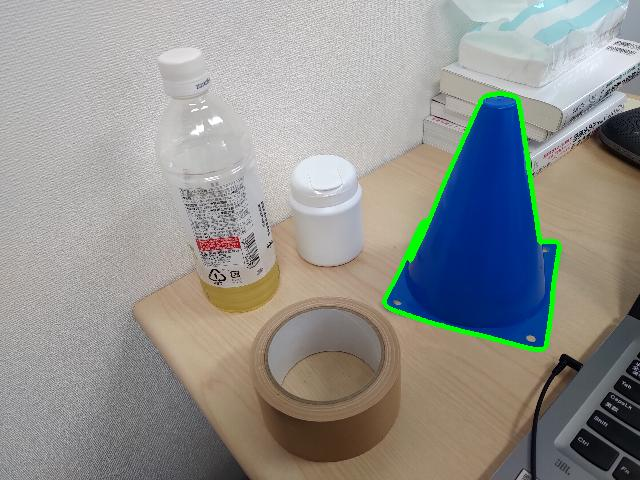

In [9]:
# 検出された最も大きな物体に輪郭の線を表示する
identify_object(img, HSV_LOWER, HSV_UPPER, EXIST_SIZE)